In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
sales_data = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
sales_data.shape

(11251, 15)

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
sales_data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
sales_data['Amount'] = sales_data['Amount'].fillna(0).astype(int)

In [7]:
sales_data = sales_data.drop(columns=['Status', 'unnamed1'])

In [8]:
sales_data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9443.527598
std,1.716125e+03,12.754122,0.493632,1.115047,5228.683337
min,1.000001e+06,12.000000,0.000000,1.000000,0.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5440.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [9]:
sales_data[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9443.527598
std,12.754122,1.115047,5228.683337
min,12.000000,1.000000,0.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


In [10]:
sales_data.loc[sales_data['Gender'] == 'F', 'Gender'] = 'Female'
sales_data.loc[sales_data['Gender'] == 'M', 'Gender'] = 'Male'

In [11]:
sales_data.loc[sales_data['Marital_Status'] == 0, 'Marital_Status'] = 'Unmarried'
sales_data.loc[sales_data['Marital_Status'] == 1, 'Marital_Status'] = 'Married'

In [12]:
sales_data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


# 

# Exploratory Data Analysis

# 1. Gender-Based Analysis of Order Volume and Spending Patterns

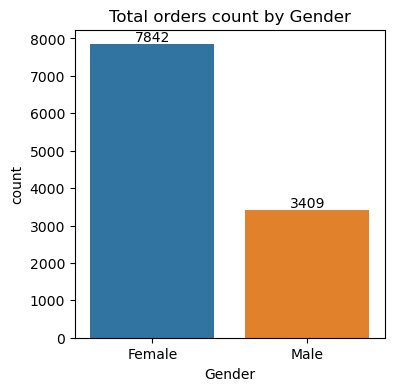

In [67]:
plt.figure(figsize=(4, 4))
plot = sns.countplot(x='Gender', data = sales_data)
plt.title('Total orders count by Gender')

for bars in plot.containers:
        plot.bar_label(bars)

In [14]:
sales_gen = sales_data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_gen['Amount'] = sales_gen['Amount'] / 1e5
sales_gen['Amount'] = sales_gen['Amount'].astype(int)

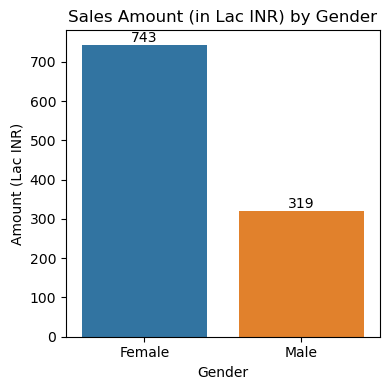

In [68]:
plt.figure(figsize=(4,4))
ax = sns.barplot(data=sales_gen, x='Gender', y='Amount')
plt.title('Sales Amount (in Lac INR) by Gender')
plt.ylabel('Amount (Lac INR)')
ax.bar_label(ax.containers[0], fmt='%.0f')  # '%0.f' removes decimal places
plt.tight_layout()

# We can see that most of the orders were placed by females, who also spent the highest total amount compared to males.

# 

# 2. Age-group Based Analysis of Order Volume and Spending Patterns

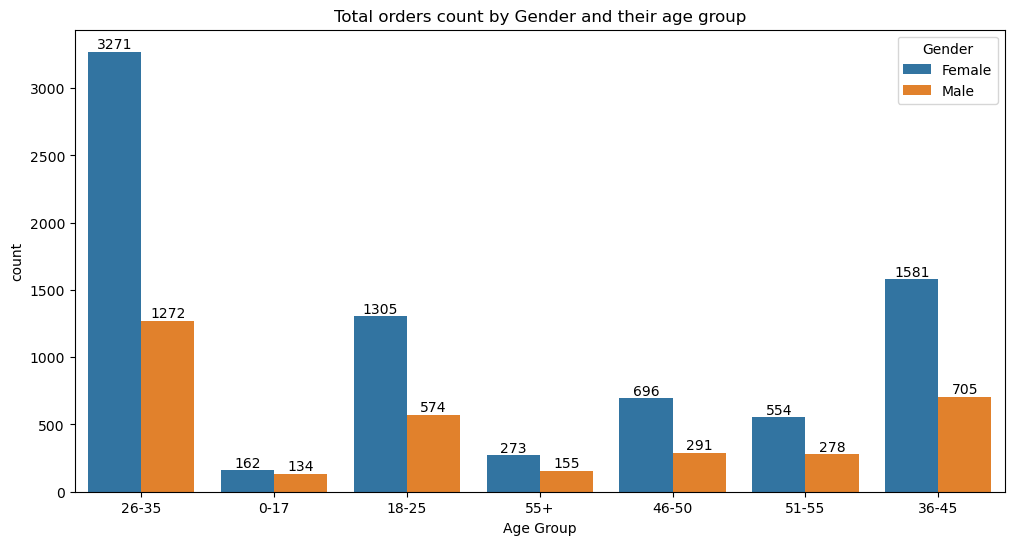

In [69]:
plt.figure(figsize=(10,6))
plot = sns.countplot(x='Age Group', data=sales_data, hue='Gender')
plt.title('Total orders count by Gender and their age group')

for bars in plot.containers:
    plot.bar_label(bars)

In [17]:
sales_age = sales_data.groupby(['Age Group', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_age['Amount'] = sales_age['Amount'] / 1e5
sales_age['Amount'] = sales_age['Amount'].astype(int)

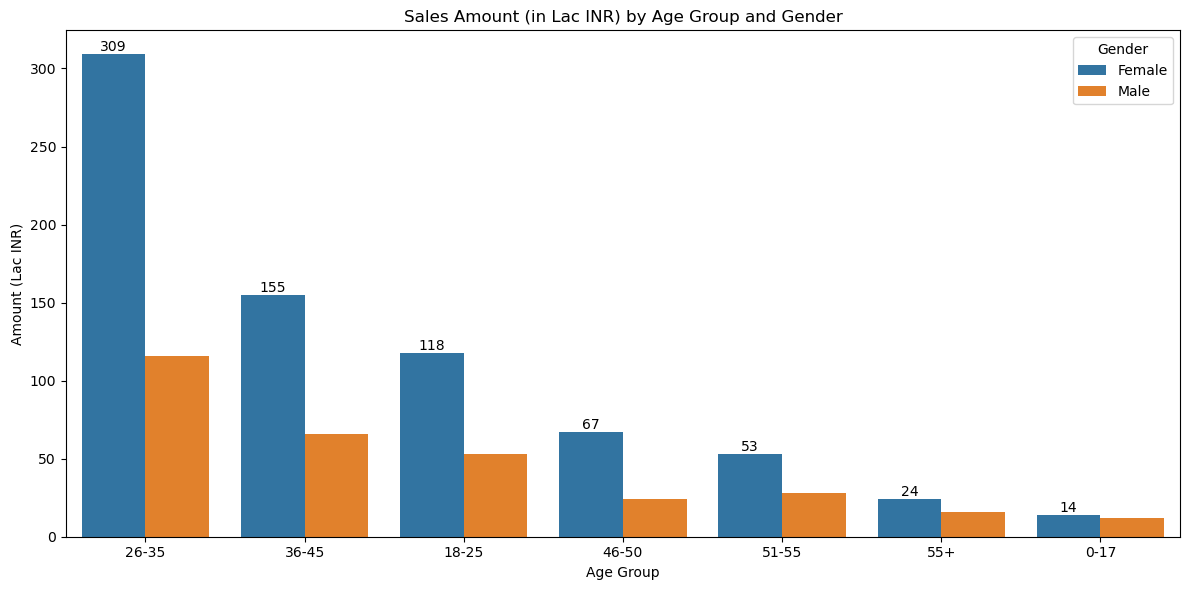

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sales_age, x='Age Group', y='Amount', hue='Gender')
plt.title('Sales Amount (in Lac INR) by Age Group and Gender')
plt.ylabel('Amount (Lac INR)')
ax.bar_label(ax.containers[0], fmt='%.0f')  # '%0.f' removes decimal places
plt.tight_layout()

# We can see that most of the orders were placed by females of age group 26-35, who also spent the highest total amount compared to males.

# 

# 3. Top 10 Cities by Order Volume and Spending Patterns

In [19]:
Sales_State_order = sales_data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

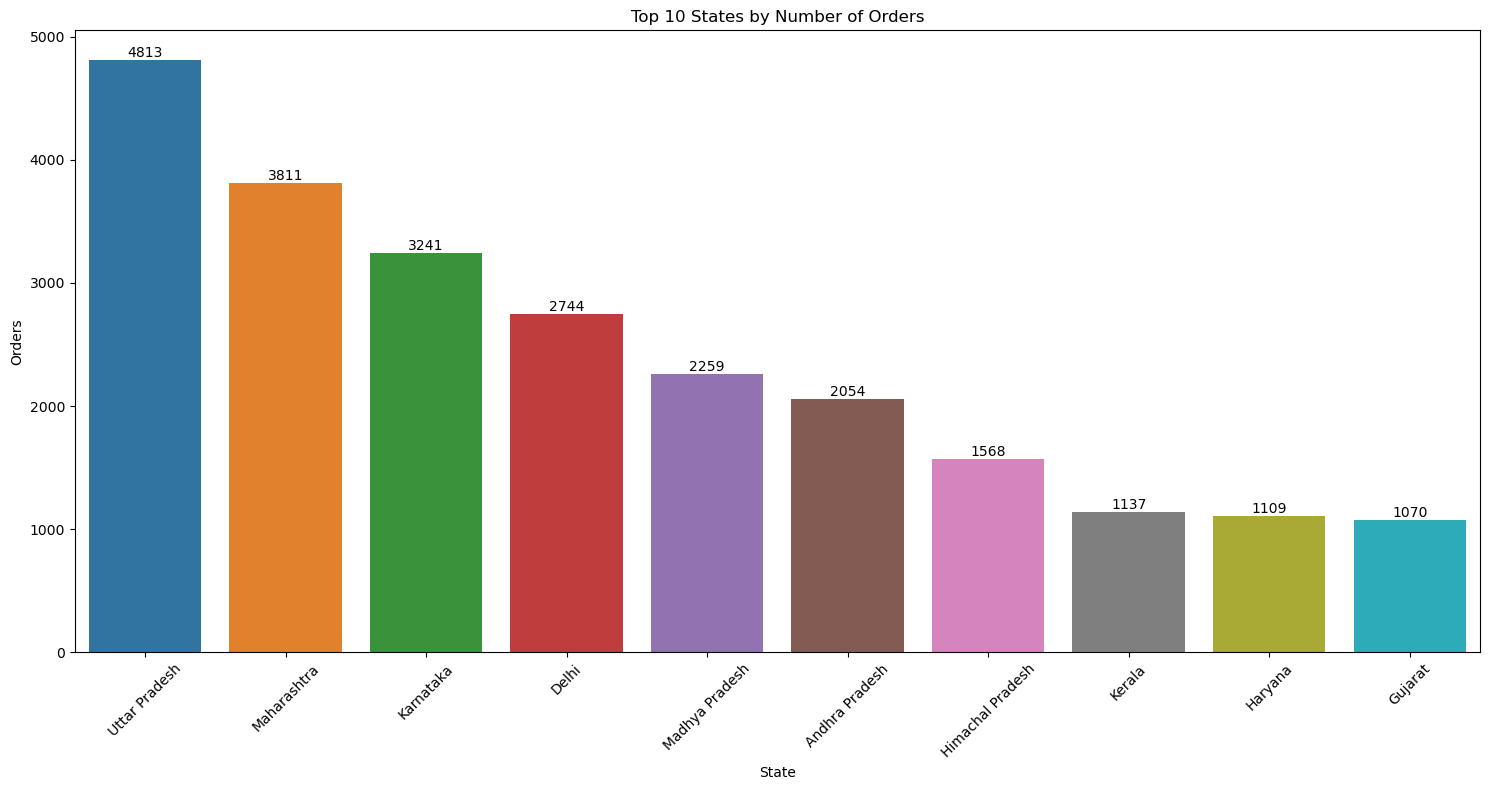

In [20]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data = Sales_State_order, x = 'State',y= 'Orders')
plt.title('Top 10 States by Number of Orders')
ax.bar_label(ax.containers[0], fmt='%.0f')  # '%0.f' removes decimal places
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()

In [21]:
sales_state_amount = sales_data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_state_amount['Amount'] = sales_state_amount['Amount'] / 1e5  # Convert to Lac INR
sales_state_amount['Amount'] = sales_state_amount['Amount'].astype(int)

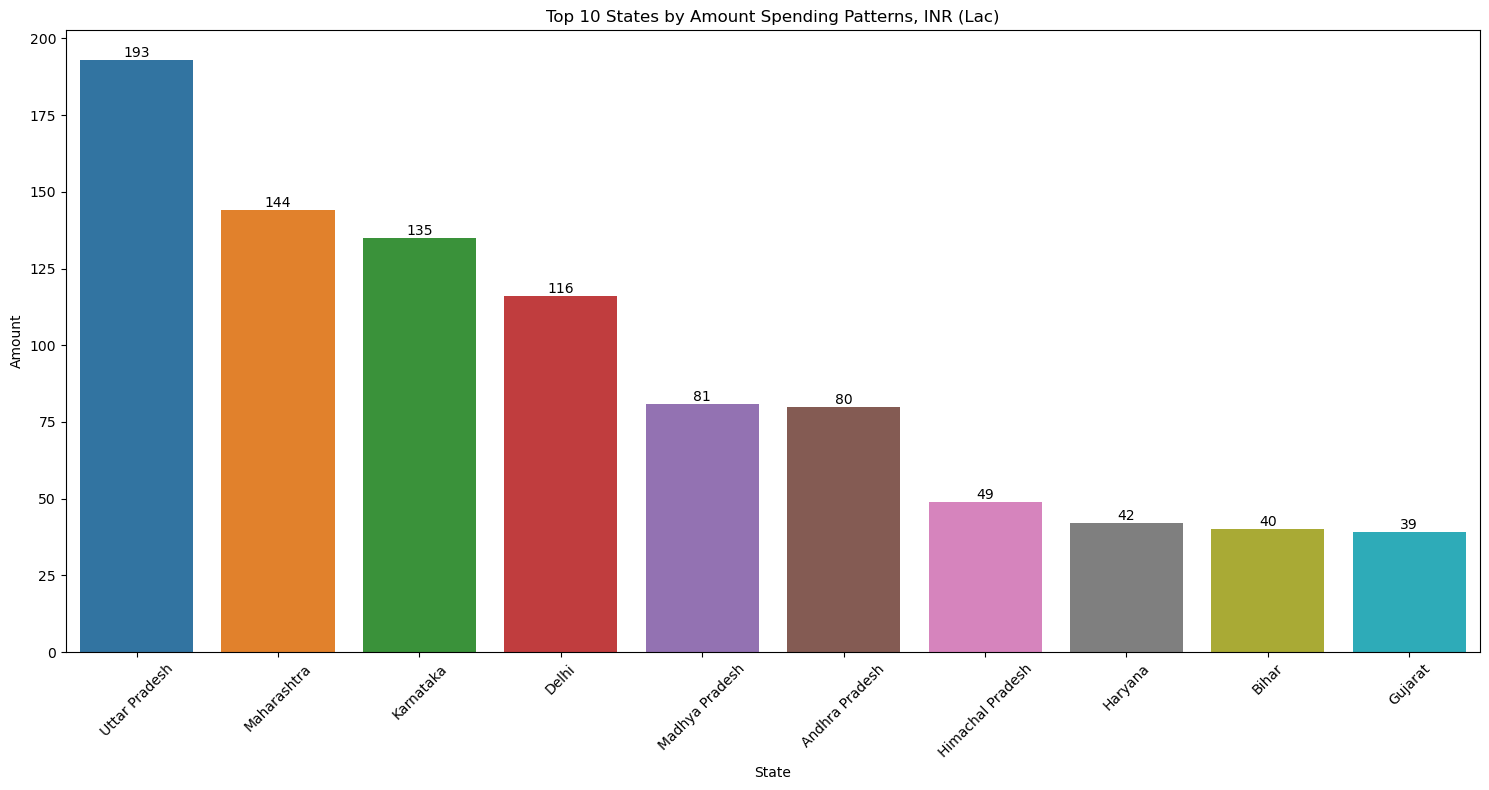

In [22]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=sales_state_amount, x='State', y='Amount')
plt.title('Top 10 States by Amount Spending Patterns, INR (Lac)')
ax.bar_label(ax.containers[0], fmt='%.0f')  # '%0.f' removes decimal places
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()


# From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

# 

# 4. Marital-Based Analysis of Order Volume and Spending Patterns

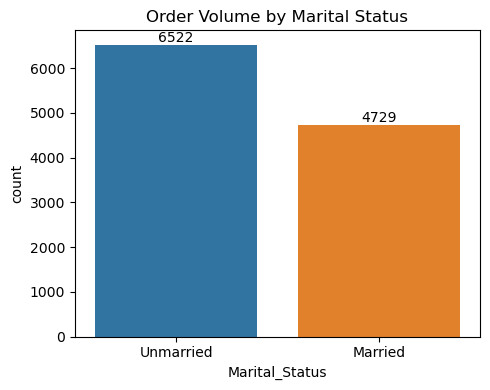

In [23]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='Marital_Status', data=sales_data)
ax.bar_label(ax.containers[0], fmt='%.0f')  # '%0.f' removes decimal places
plt.title('Order Volume by Marital Status')
plt.tight_layout()

In [24]:
sales_status = sales_data.groupby(['Marital_Status'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_status['Amount'] = sales_status['Amount'] / 1e5
sales_status['Amount'] = sales_status['Amount'].astype(int)

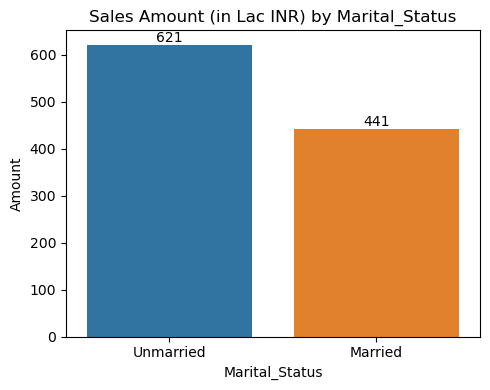

In [25]:
plt.figure(figsize=(5,4))
ax = sns.barplot(data=sales_status, x='Marital_Status', y= 'Amount')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Sales Amount (in Lac INR) by Marital_Status')
plt.tight_layout()

# We can see that most of the orders were placed by Unmarried, who also spent the highest total amount compared to Married.

# 

# 5. Occupation-Based Analysis of Order Volume and Spending Patterns

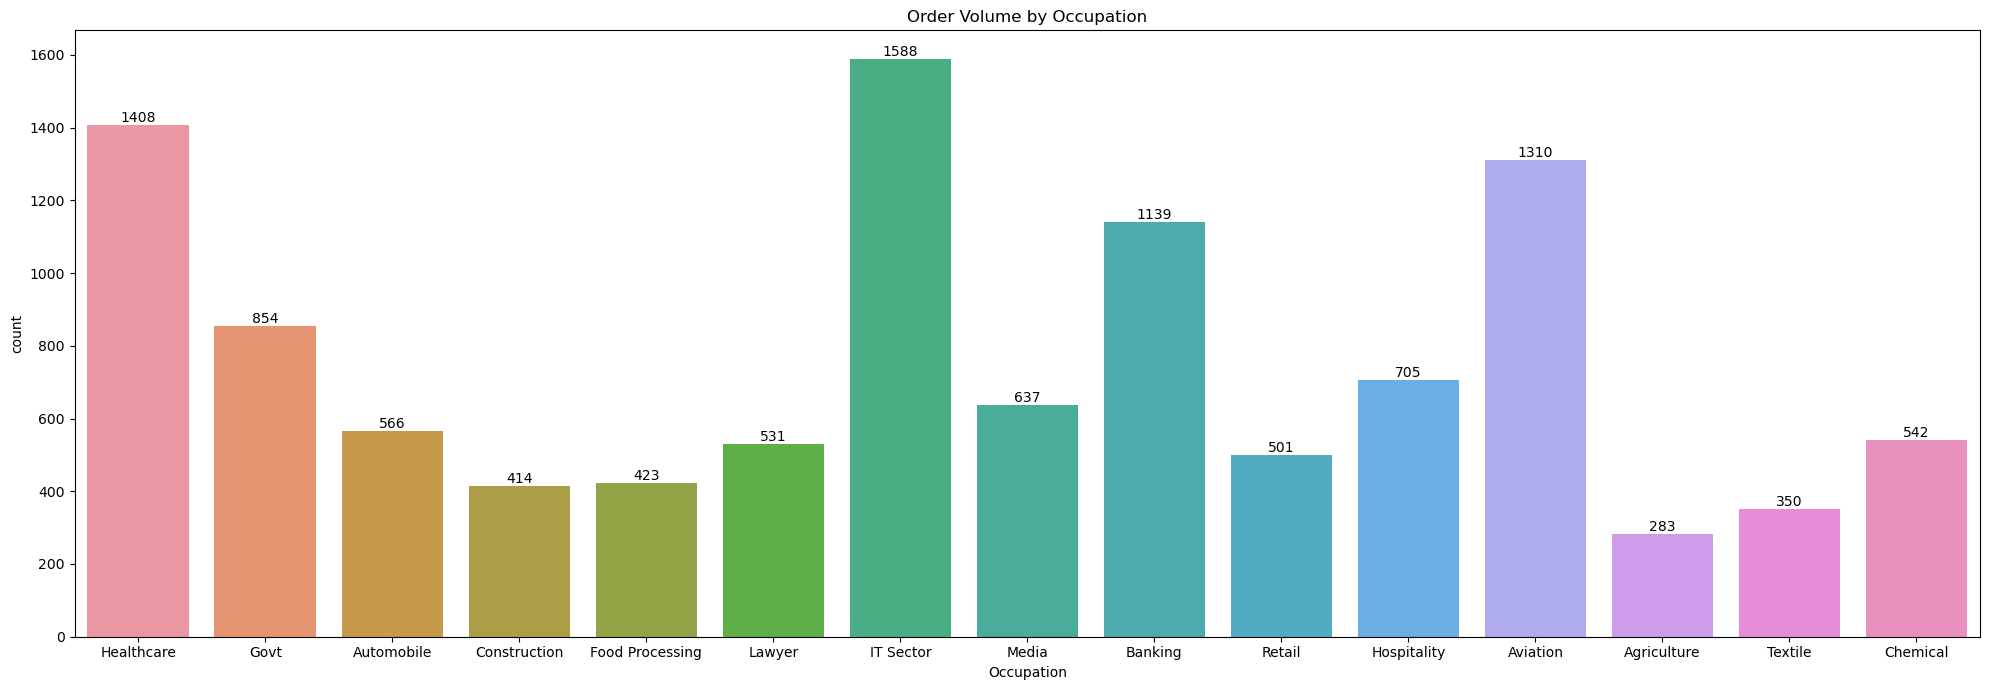

In [34]:
plt.figure(figsize=(20,7))
ax = sns.countplot(x='Occupation', data = sales_data)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Order Volume by Occupation')
plt.tight_layout()

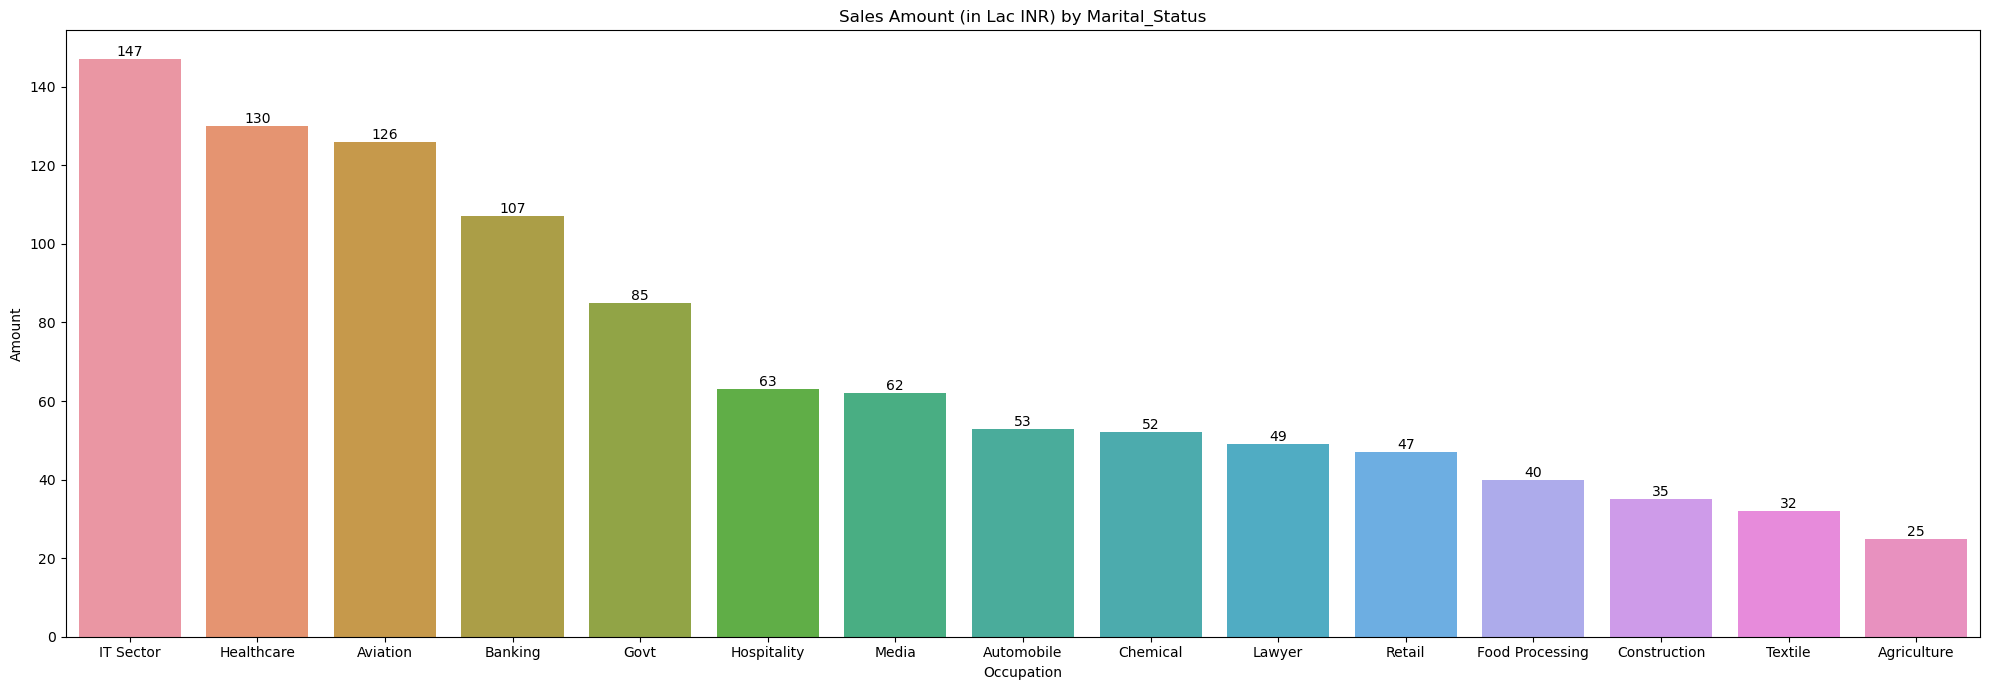

In [72]:
sales_occ = sales_data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_occ['Amount'] = sales_occ['Amount'] / 1e5
sales_occ['Amount'] = sales_occ['Amount'].astype(int)

plt.figure(figsize=(20,7))
ax = sns.barplot(data=sales_occ, x='Occupation', y= 'Amount')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Sales Amount (in Lac INR) by Occupation')
plt.tight_layout()

# We observed that most of the orders are placed by individuals from the IT, Healthcare, and Aviation sectors, and they also account for the highest spending.

# 

# 6. Product-Category Based Analysis of Order Volume and Spending Patterns

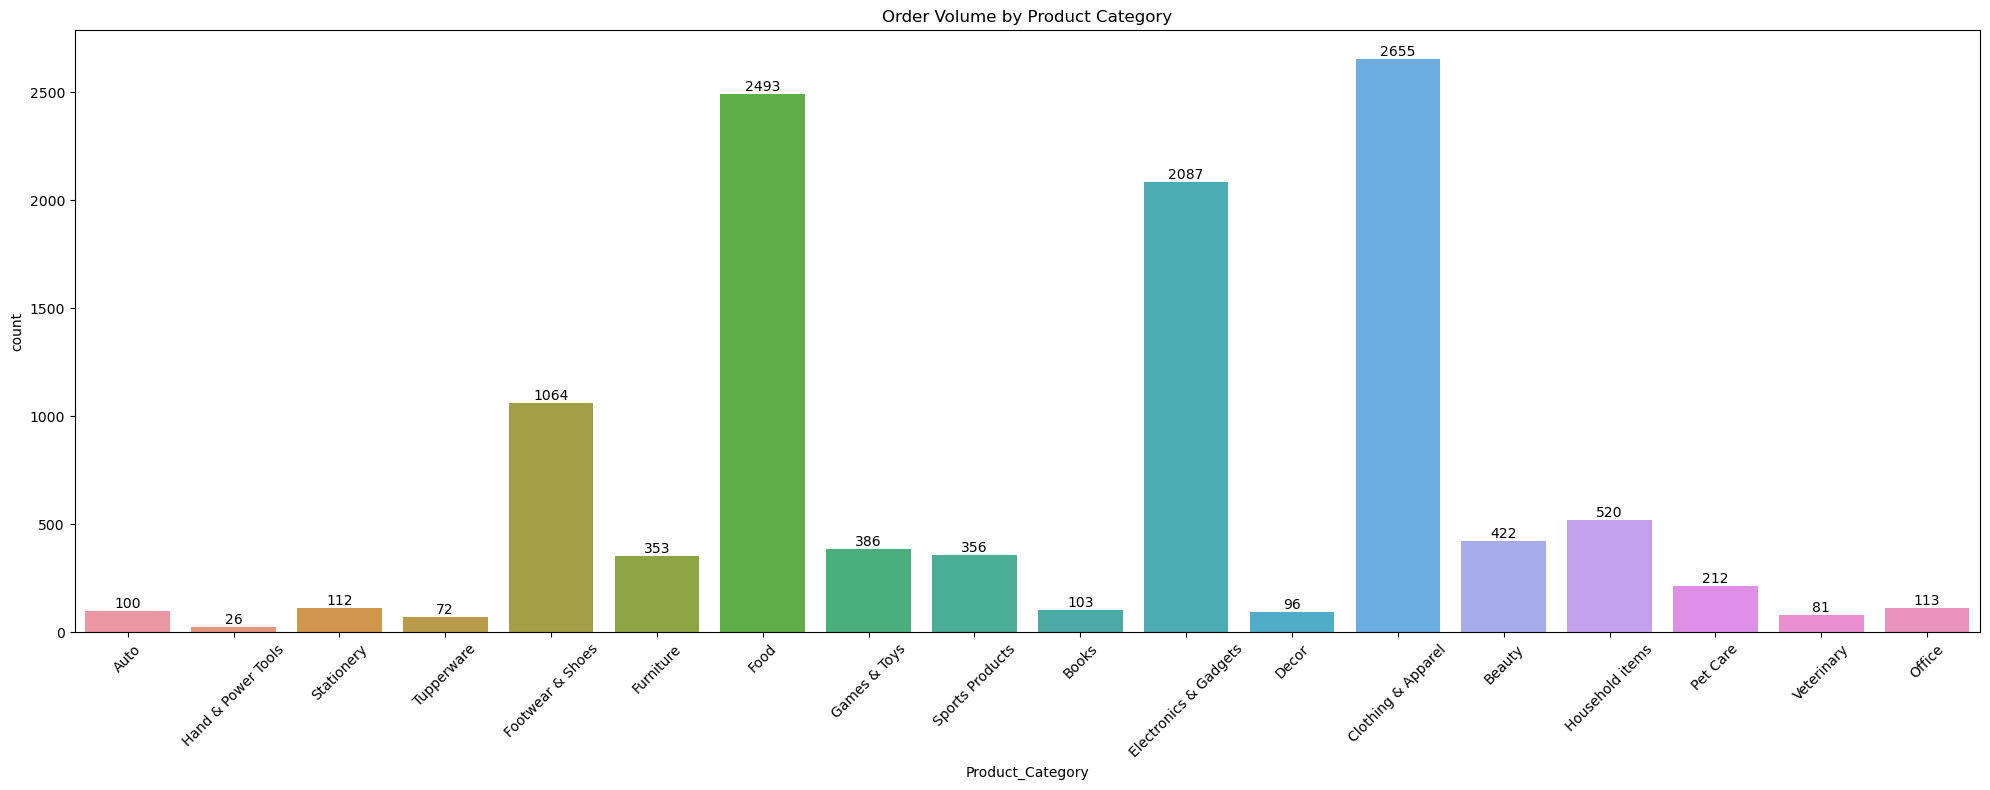

In [56]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
ax = sns.countplot(x='Product_Category', data = sales_data)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Order Volume by Product Category')
plt.tight_layout()

In [63]:
sales_catg= sales_data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_catg['Amount'] = sales_catg['Amount'] /1e5
sales_catg['Amount'] = sales_catg['Amount'].astype(int)


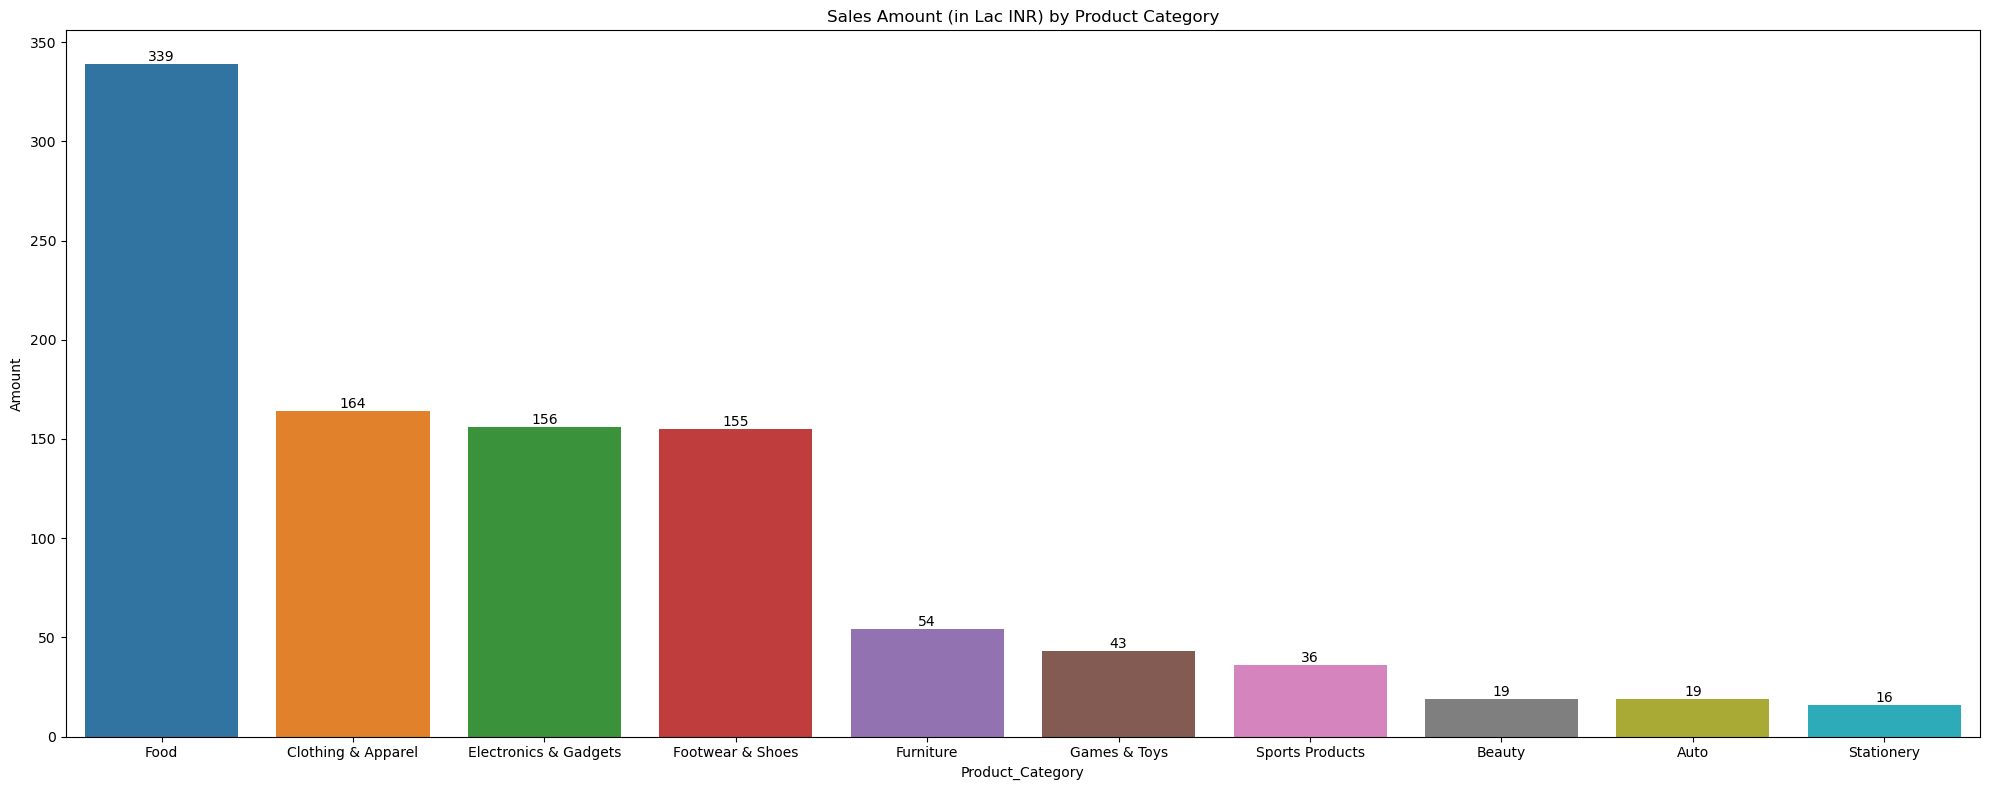

In [66]:
plt.figure(figsize=(20,8))
ax = sns.barplot(data = sales_catg, x='Product_Category', y='Amount')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.title('Sales Amount (in Lac INR) by Product Category')
plt.tight_layout()

# we can see that as per above graphs that most of the orders placed in 'Cloathing & Appreal', 'Food' and 'Electronics & Gadgets' categories However, they are spending highest amount in 'Food', 'Cloathing & Appreal' and 'Electronics & Gadgets' categories

# 

# Conclusion:

Based on the Diwali sales data, most purchases were made by women aged 26–35, especially from states like Uttar Pradesh, Maharashtra, and Karnataka. Unmarried people and those working in IT and healthcare were among the top spenders.